# **Effect of COVID-19 Pandemic on India**

## **Introduction**

**_This project aims to analyze the impact of the COVID-19 pandemic on India and its various states. The analysis focuses on several key aspects, including active cases, deaths, vaccinations, and growth trends. The results are visualized using graphs to provide a clear and comprehensive understanding of the pandemic's effects._**

## **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)  # type: ignore
print("Matplotlib Version:", matplotlib.__version__)  # type: ignore
print("Seaborn Version:", sns.__version__)  # type: ignore

import warnings
warnings.filterwarnings("ignore")

NumPy Version: 1.26.4
Pandas Version: 2.2.2
Matplotlib Version: 3.9.1
Seaborn Version: 0.13.2


## **Data Cleaning and Preprocessing**

In [2]:
dfc = pd.read_csv('Data/COVID19_India.csv')
dfv = pd.read_csv('Data/COVID_Vaccine_Statewise.csv')

In [3]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
dfc.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [5]:
dfc.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1, inplace = True)
dfc['Date'] = pd.to_datetime(dfc['Date'], format = '%Y-%m-%d')
dfv.rename(columns = {"Updated On": "Vaccine Date"}, inplace = True)

In [6]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [7]:
dfv.isnull().sum()

Vaccine Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [8]:
vaccination = dfv.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)

vaccine = dfv[dfv.State != 'India']
vaccine.rename(columns = {"Total Individuals Vaccinated": "Total"}, inplace = True)

In [9]:
dfc['Active'] = dfc['Confirmed'] - (dfc['Cured'] + dfc['Deaths'])
statewise = pd.pivot_table(dfc, values = ['Confirmed', 'Deaths', 'Cured'], index = 'State/UnionTerritory', aggfunc = max)

In [10]:
statewise['Recovery Rate'] = statewise['Cured'] * 100 / statewise['Confirmed']
statewise['Mortality Rate'] = statewise['Deaths'] * 100 / statewise['Confirmed']
statewise = statewise.sort_values(by = 'Confirmed', ascending = False)

In [11]:
statewise.style.background_gradient(cmap = 'gray')

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


## **Exploratory Data Analysis**

### **Active Cases (Top 15 States)**

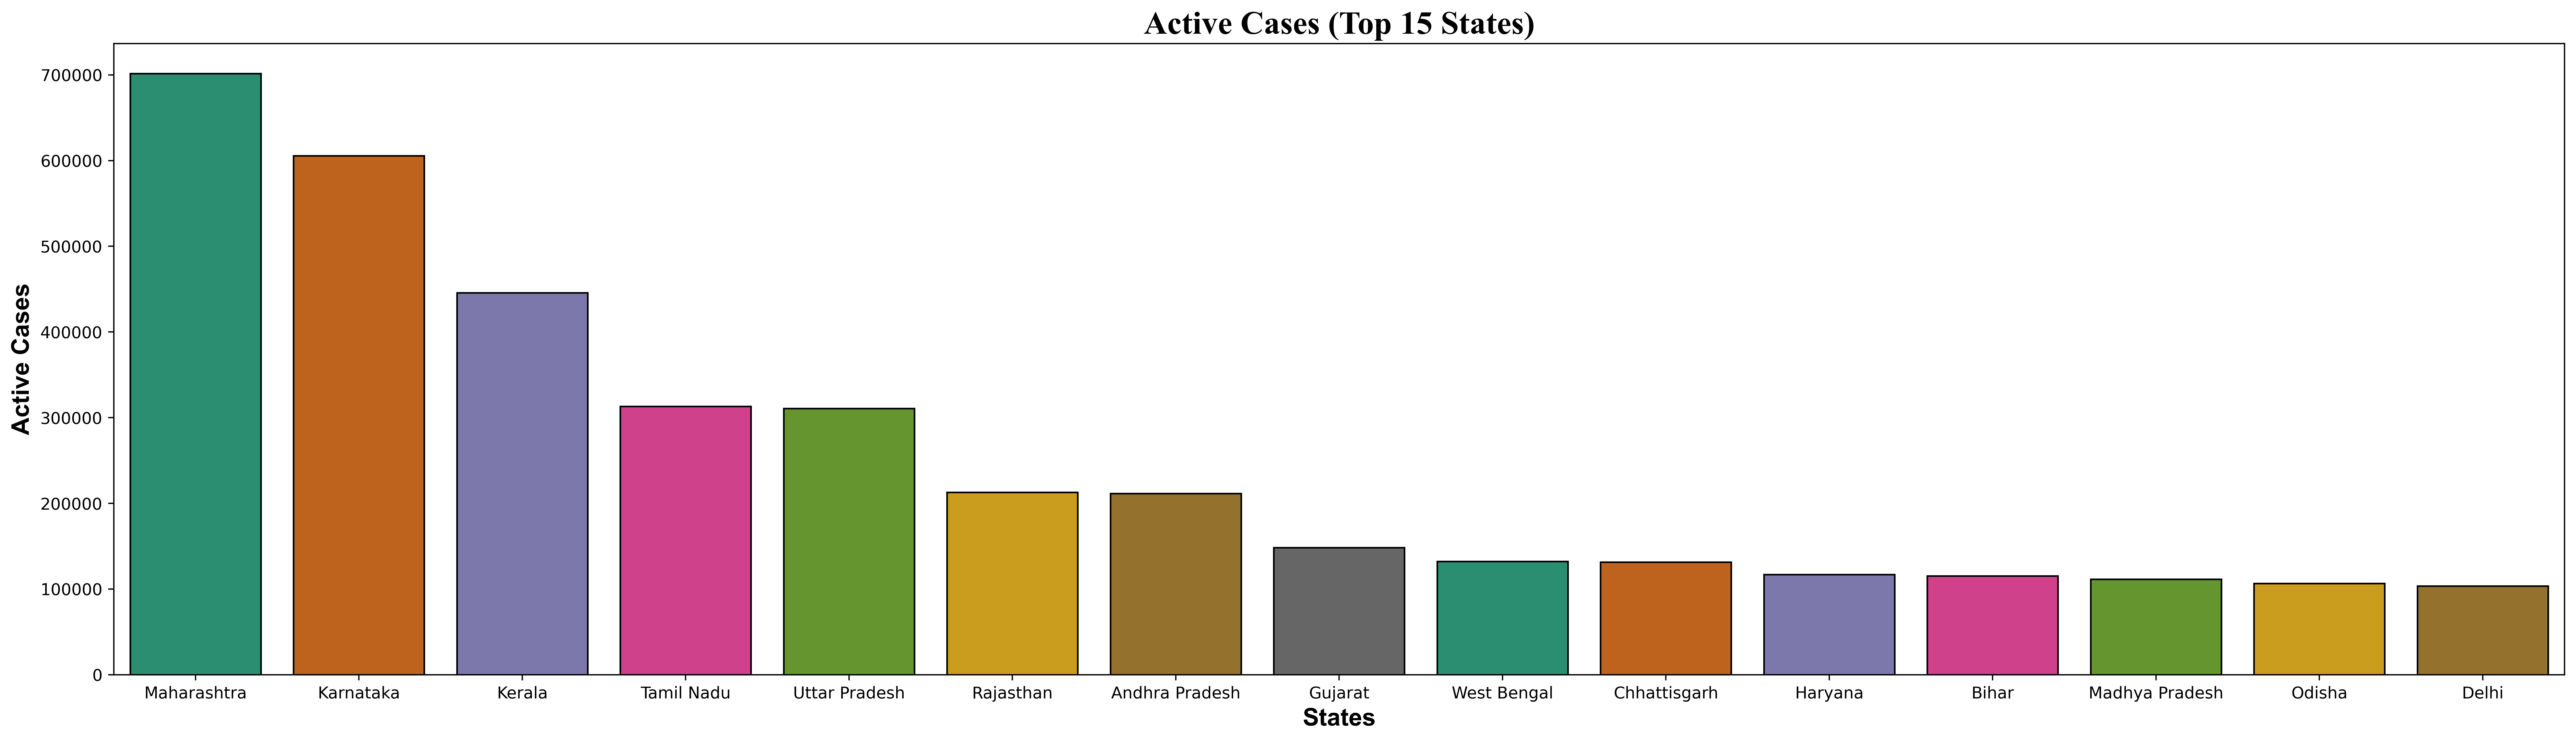

In [12]:
top_active = dfc.groupby(by = 'State/UnionTerritory').max()[['Active', 'Date']].sort_values(by = ['Active'], ascending = False).reset_index()

plt.figure(figsize = (27, 7), dpi = 500)
sns.barplot(x = 'State/UnionTerritory', y = 'Active', data = top_active.iloc[:15], palette = 'Dark2', linewidth = 1, edgecolor = 'black')

plt.xlabel('States', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Active Cases', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 15, 'fontweight': 'bold'})
plt.title("Active Cases (Top 15 States)", fontdict = {'fontname': 'Times New Roman', 'color': 'black', 'fontsize': 20, 'fontweight': 'bold'})

plt.show()

**_From the analysis above, we may infer that Maharashtra has the most COVID-19 active cases, followed by Karnataka, Kerala, and Tamil Nadu, in that order._**

### **Most Deaths (Top 15 States)**

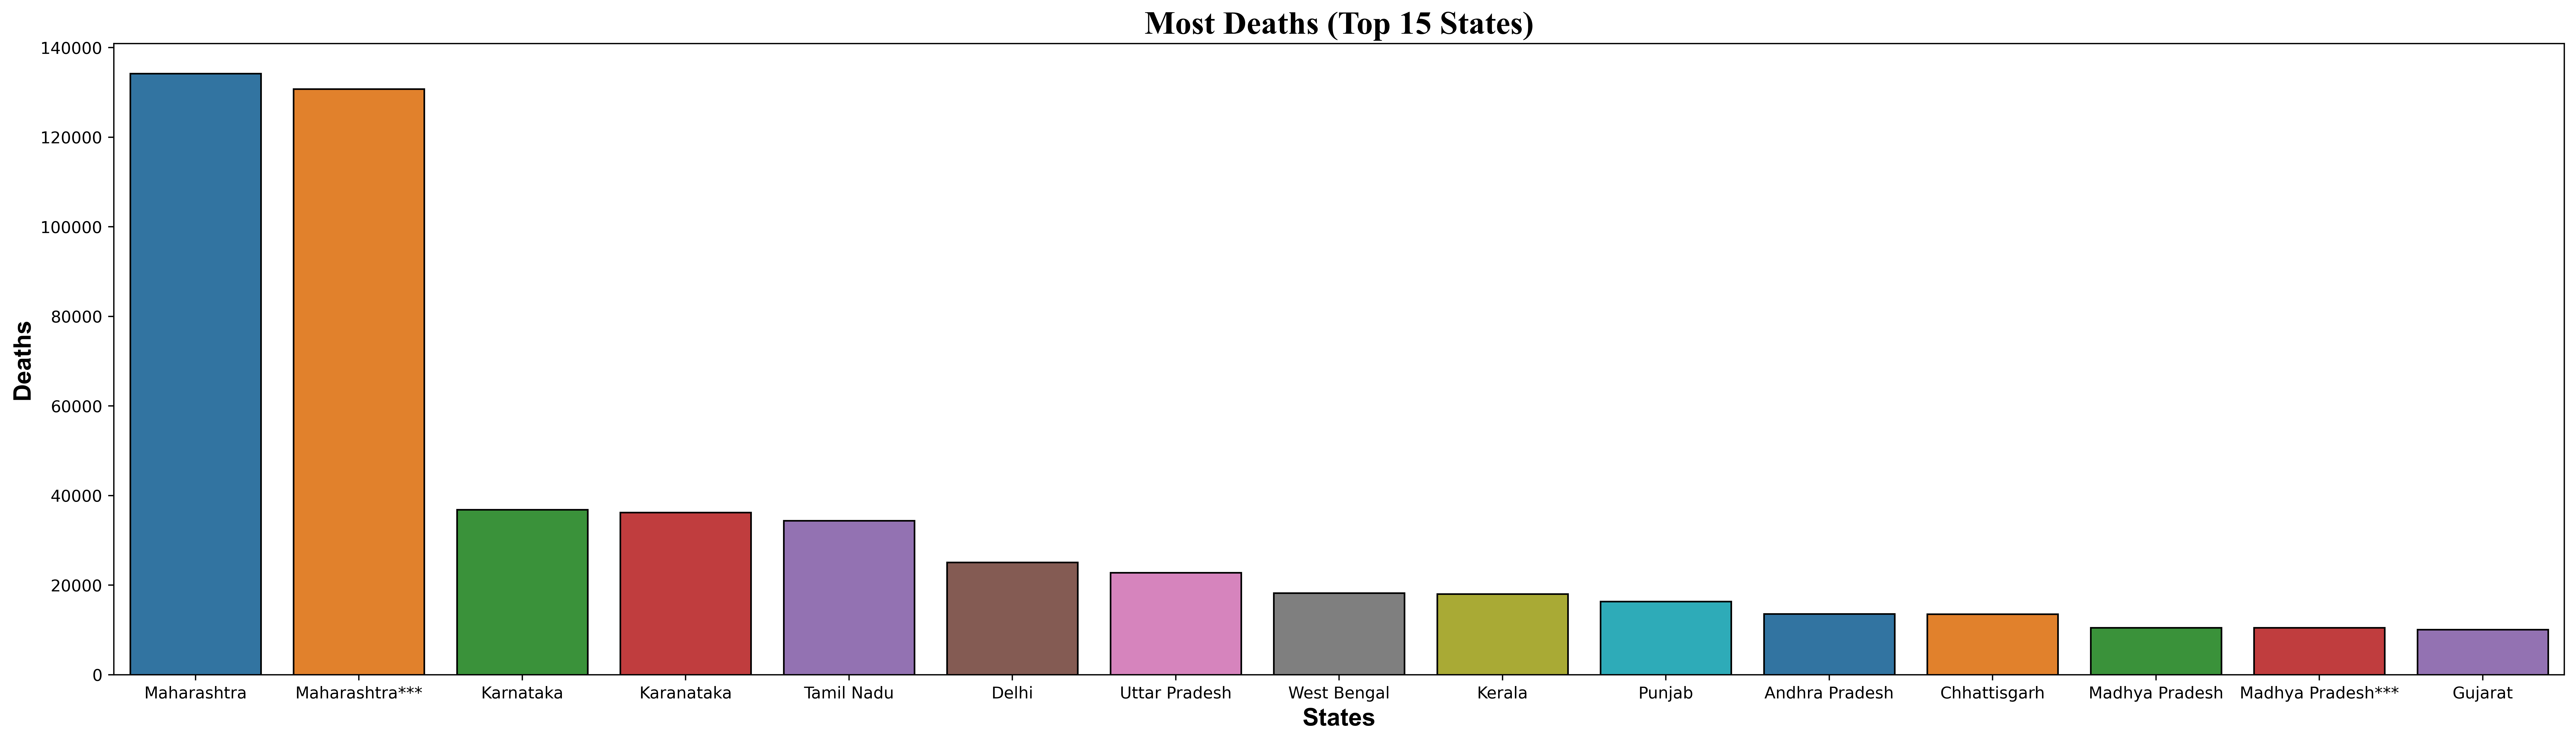

In [13]:
top_deaths = dfc.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by = ['Deaths'], ascending = False).reset_index()

plt.figure(figsize = (27, 7), dpi = 500)
sns.barplot(x = 'State/UnionTerritory', y = 'Deaths', data = top_deaths.iloc[:15], palette = 'tab10', linewidth = 1, edgecolor = 'black')

plt.xlabel('States', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Deaths', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 15, 'fontweight': 'bold'})
plt.title("Most Deaths (Top 15 States)", fontdict = {'fontname': 'Times New Roman', 'color': 'black', 'fontsize': 20, 'fontweight': 'bold'})

plt.show()

**_According to the analysis above, Maharashtra has the most COVID-19 deaths, followed by Karnataka, Tamil Nadu, and New Delhi, in that order._**

### **COVID-19 Growth Trend**

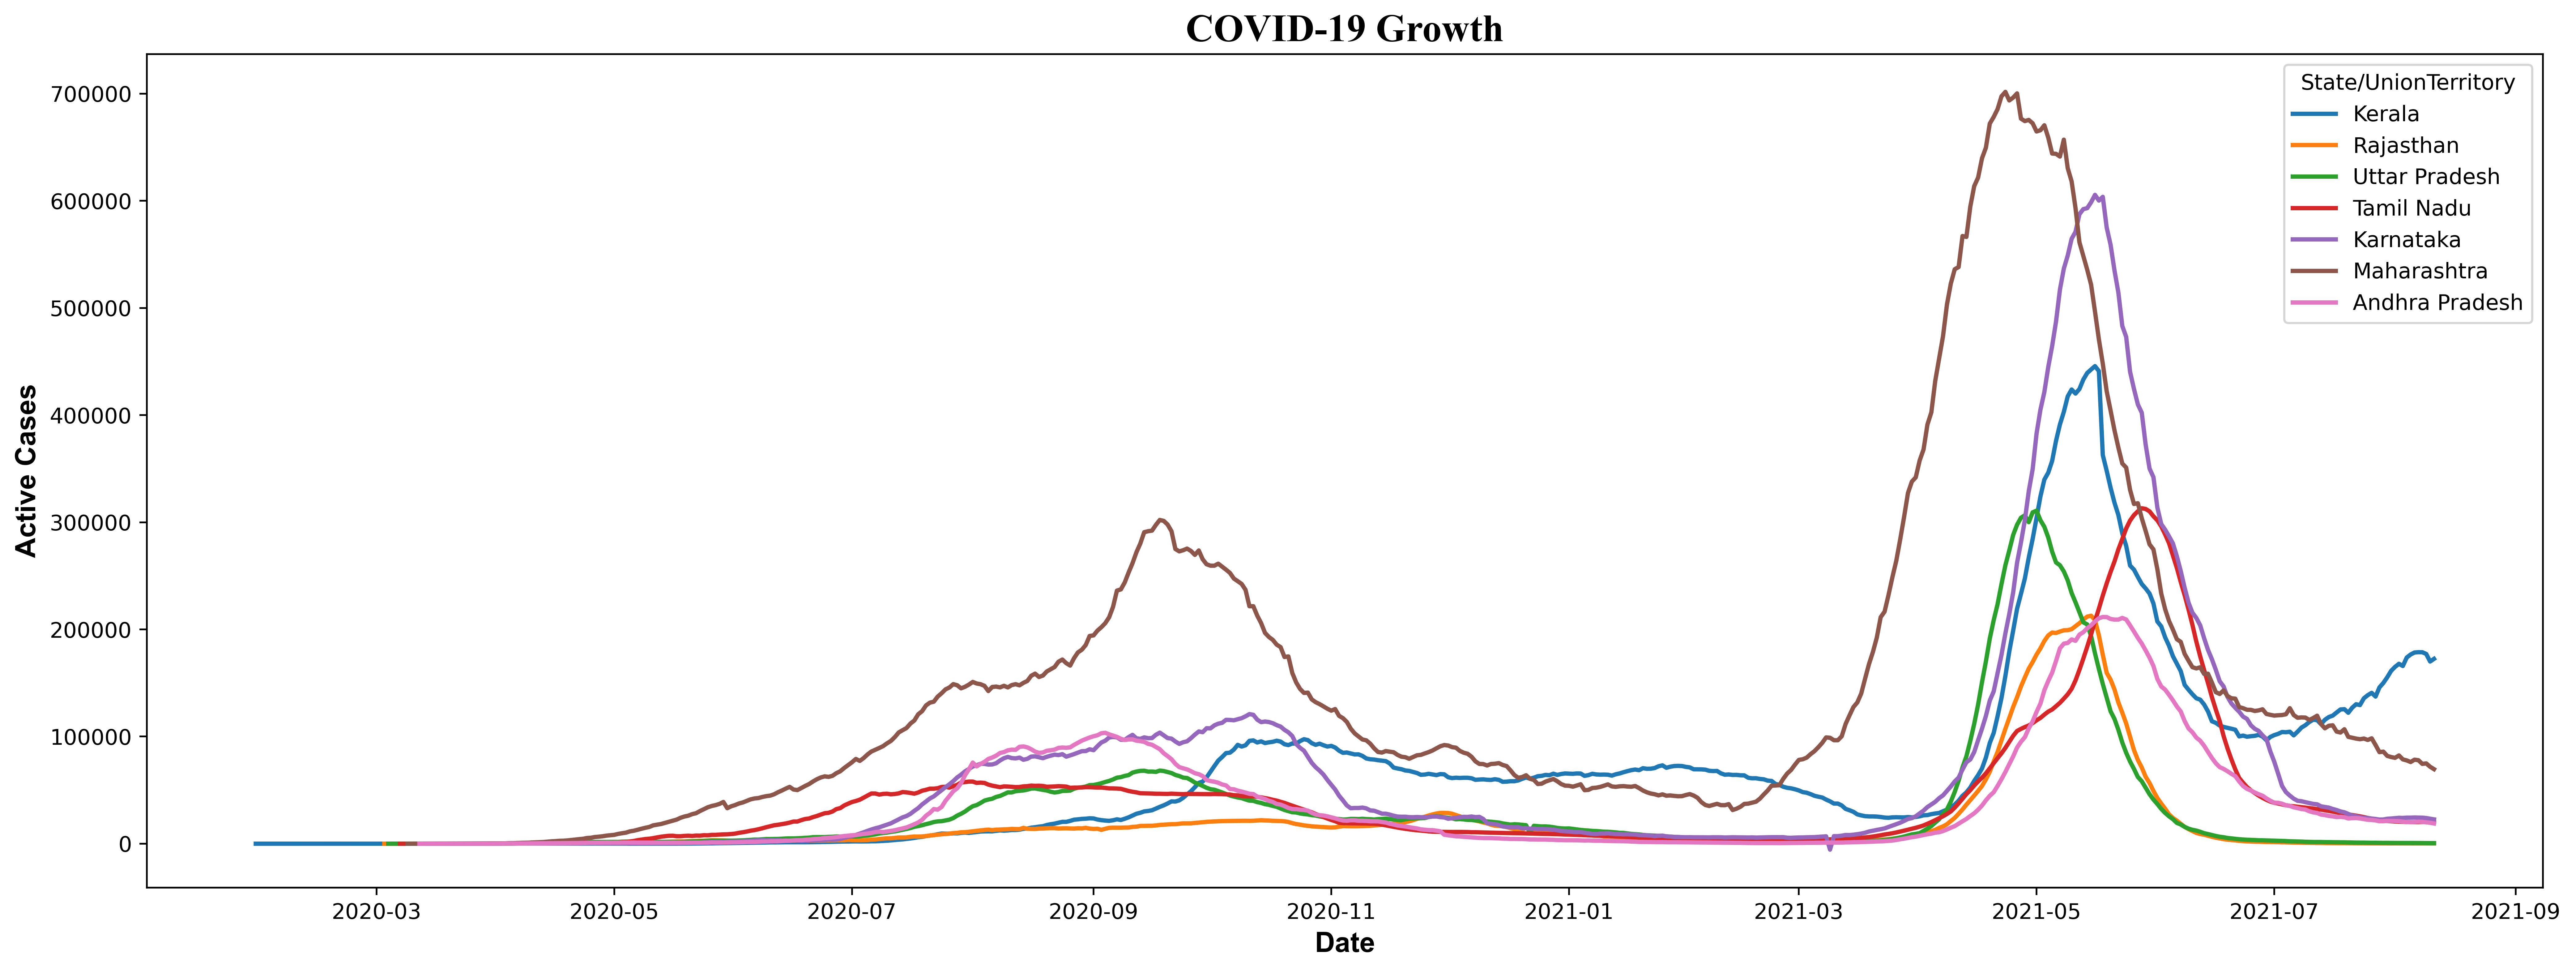

In [14]:
plt.figure(figsize = (20, 7), dpi = 500)
sns.lineplot(data = dfc[dfc['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh', 'Rajasthan', 'Andhra Pradesh'])], 
             x = 'Date', y = 'Active', hue = 'State/UnionTerritory', linewidth = 2)

plt.xlabel('Date', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 13, 'fontweight': 'bold'})
plt.ylabel('Active Cases', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 13, 'fontweight': 'bold'})
plt.title("COVID-19 Growth", fontdict = {'fontname': 'Times New Roman', 'color': 'black', 'fontsize': 18, 'fontweight': 'bold'})

plt.show()

**_The analysis above shows COVID-19's growth through time._**

### **Gender (COVID-19 Vaccination)**

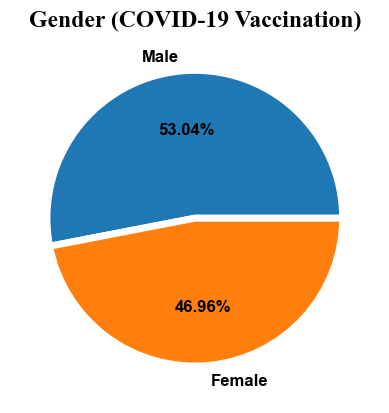

In [15]:
male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()

label = ['Male', 'Female']

plt.pie([male, female], labels = label, autopct = '%.2f%%', textprops = {"font" : "Arial", "size" : "large", "weight" : "bold"}, wedgeprops = {"edgecolor" : "white", "linewidth" : 5, 'antialiased': True})
plt.title('Gender (COVID-19 Vaccination)', fontdict = {'fontname': 'Times New Roman', 'color': 'black', 'fontsize': 17, 'fontweight': 'bold'})

plt.show()

**_We infer from the study above that during the COVID-19 vaccination effort, males had a greater rate of immunisation than females._**

### **Most Vaccinations (Top 15 States)**

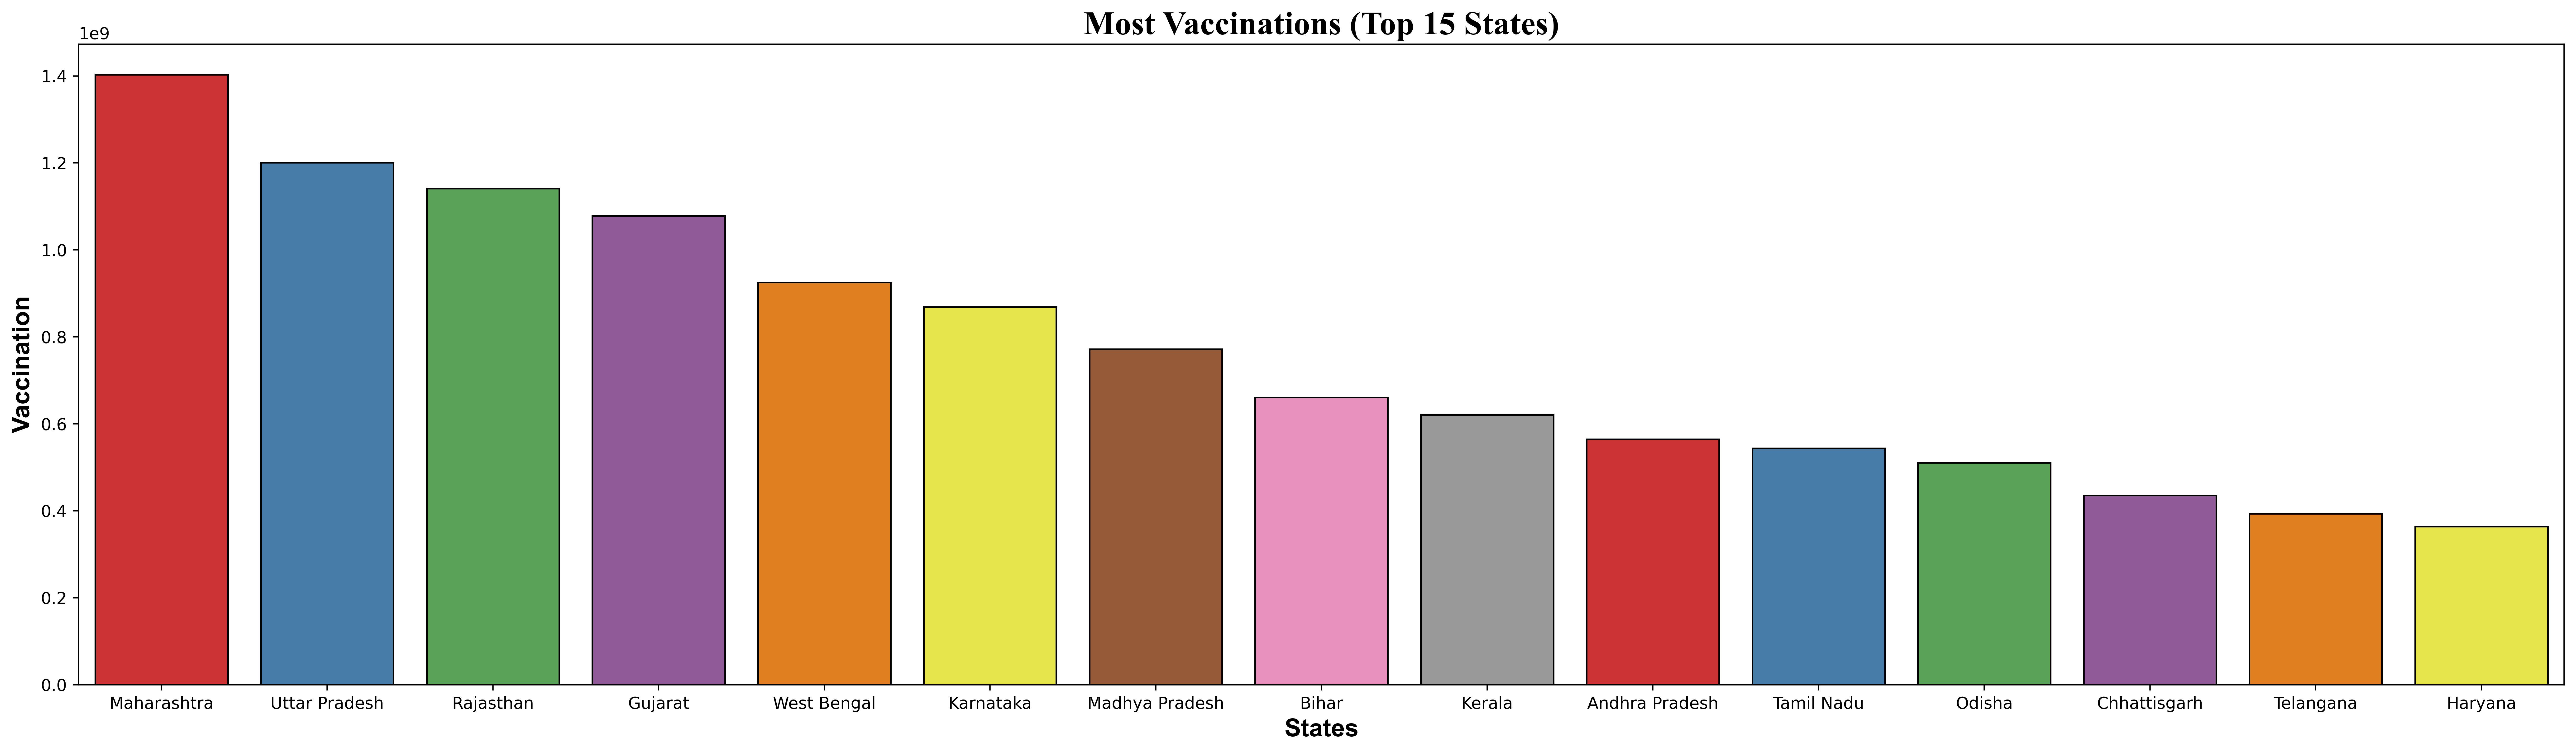

In [16]:
vaccine_max = vaccine.groupby('State')['Total'].sum().to_frame('Total')
vaccine_max = vaccine_max.sort_values('Total', ascending = False)[:15]

plt.figure(figsize = (27, 7), dpi = 500)
sns.barplot(x = vaccine_max.index, y = vaccine_max.Total, data = vaccine_max.iloc[:15], palette = 'Set1', linewidth = 1, edgecolor = 'black')

plt.xlabel('States', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('Vaccination', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 15, 'fontweight': 'bold'})
plt.title("Most Vaccinations (Top 15 States)", fontdict = {'fontname': 'Times New Roman', 'color': 'black', 'fontsize': 20, 'fontweight': 'bold'})

plt.show()

**_The analysis above shows, Maharashtra had the most vaccinations, followed by Uttar Pradesh, Rajasthan, and Gujarat._**

### **Least Vaccinations (Top 15 States)**

In [17]:
vaccine_min = vaccine.groupby('State')['Total'].sum().to_frame('Total')
vaccine_min = vaccine_min.sort_values('Total', ascending = True)[:10]

plt.figure(figsize = (30, 10), dpi = 700)
sns.barplot(x = vaccine_min.index, y = vaccine_min.Total, data = vaccine_min.iloc[:10], palette = 'Set2', linewidth = 1, edgecolor = 'black')

plt.xlabel('States', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 17, 'fontweight': 'bold'})
plt.ylabel('Vaccination', fontdict = {'fontname': 'Arial', 'color': 'black', 'fontsize': 17, 'fontweight': 'bold'})
plt.title("Least Vaccinations (Top 15 States)", fontdict = {'fontname': 'Times New Roman', 'color': 'black', 'fontsize': 22, 'fontweight': 'bold'})

plt.show()

**_The analysis above shows, Lakshadweep had the least vaccinations, followed by Andaman and Nicobar Islands, Ladakh, and Dadra and Nagar Haveli and Daman and Diu._**

## **Conclusion**

**_According to the data analysis project mentioned above on the 2019 Coronavirus Pandemic in India, Maharashtra had the highest number of active cases, the fastest vaccination rate, and the highest number of fatalities. In India, Uttar Pradesh had the second-highest vaccination rate, while Karnataka had the second-highest COVID activity rate. The Andaman and Nicobar islands and Lakshadweep were the two Union Territories with the lowest vaccination rates, respectively. Additionally, we learned that COVID-19 was spreading over time and that men were more likely to be immunised than women._**